In [1]:
import math
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
from IPython.display import Image
import simpy

In [2]:
import random

In [95]:
import statistics

In [123]:
wait_times = []
timestamps_list = []

In [138]:
class coffee_shop(object):
    def __init__(self, env, num_cashiers = 2, num_baristas = 2):
        self.env = env
        self.cashiers = simpy.Resource(env, num_cashiers)
        self.baristas = simpy.Resource(env, num_baristas)
        
    def order_drinks(self, customer):
        yield self.env.timeout(np.random.poisson(1))
        
    def get_drinks(self, customer):
        yield self.env.timeout(np.random.poisson(2))

In [113]:
s = np.random.poisson(3, 10000)

In [129]:
s[:25]

array([3, 3, 3, 0, 6, 3, 0, 1, 0, 6, 4, 1, 0, 2, 4, 3, 2, 1, 4, 3, 3, 5,
       1, 4, 2])

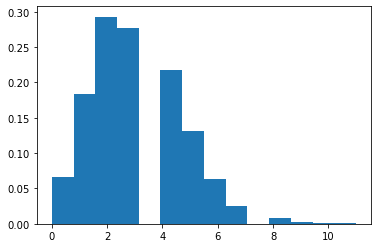

In [114]:
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

In [139]:
def get_coffee(env, customer, Coffee_shop):
    arrival_time = env.now
    
    with Coffee_shop.cashiers.request() as request:
        yield request
        order_complete = env.now
        yield env.process(Coffee_shop.order_drinks(customer))
        
    with Coffee_shop.baristas.request() as request:
        yield request
        recieved_order = env.now
        yield env.process(Coffee_shop.get_drinks(customer))
        
    wait_times.append(env.now - arrival_time)
    wait_time = env.now - arrival_time
    
    timestamps = {'customer_id': customer,
                  'arrival_time': arrival_time,
                  'order_complete': order_complete,
                  'pick_up_order': recieved_order,
                  'total_wait': wait_time}
    timestamps_list.append(timestamps)
    

In [140]:
def run_coffee_shop(env, num_cashiers, num_baristas, stoptime = simpy.core.Infinity, max_arrivals = 200):
    Coffee_shop = coffee_shop(env, num_cashiers, num_baristas)
    
    for customer in range(3):
        env.process(get_coffee(env, customer, Coffee_shop))
    
    while env.now < stoptime and customer < max_arrivals:
        iat = np.random.poisson(3)
        
        yield env.timeout(iat)
        
        customer += 1
        
        env.process(get_coffee(env, customer, Coffee_shop))
        
    print(f"{customer} customers have arrived.")
    
    

In [141]:
def get_user_input():
    num_cashiers = input("Input # of cashiers working: ")
    num_baristas = input("Input # of baristas working: ")
    params = [num_cashiers, num_baristas]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. The simulation will use default values:",
            "\n1 cashier, 1 baristas.",
        )
        params = [1, 1]
    return params

In [142]:
def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

In [143]:
def get_max_wait_time(wait_times):
    max_wait = np.max(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(max_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

In [150]:
wait_times = []
timestamps_list = []
def main():
    # Setup
    random.seed(42)
    num_cashiers, num_baristas = get_user_input()
    

    # Run the simulation
    env = simpy.Environment()
    env.process(run_coffee_shop(env, num_cashiers, num_baristas, stoptime = 100, max_arrivals = 200))
    env.run()

    # View the results
    mins, secs = get_average_wait_time(wait_times)
    mx_mins, mx_secs = get_max_wait_time(wait_times)
    print(
        "Running simulation...",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
        f"\nThe longest wait time was {mx_mins} minutes and {mx_secs} seconds.",
    )


if __name__ == "__main__":
    main()

Input # of cashiers working:  4
Input # of baristas working:  4


34 customers have arrived.
Running simulation... 
The average wait time is 2 minutes and 46 seconds. 
The longest wait time was 6 minutes and 0 seconds.


In [149]:
timestamps_list

[{'customer_id': 0,
  'arrival_time': 0,
  'order_complete': 0,
  'pick_up_order': 0,
  'total_wait': 0},
 {'customer_id': 1,
  'arrival_time': 0,
  'order_complete': 0,
  'pick_up_order': 1,
  'total_wait': 2},
 {'customer_id': 2,
  'arrival_time': 0,
  'order_complete': 1,
  'pick_up_order': 1,
  'total_wait': 3},
 {'customer_id': 3,
  'arrival_time': 4,
  'order_complete': 4,
  'pick_up_order': 5,
  'total_wait': 4},
 {'customer_id': 5,
  'arrival_time': 8,
  'order_complete': 8,
  'pick_up_order': 8,
  'total_wait': 1},
 {'customer_id': 4,
  'arrival_time': 4,
  'order_complete': 5,
  'pick_up_order': 7,
  'total_wait': 7},
 {'customer_id': 6,
  'arrival_time': 14,
  'order_complete': 14,
  'pick_up_order': 15,
  'total_wait': 6},
 {'customer_id': 7,
  'arrival_time': 21,
  'order_complete': 21,
  'pick_up_order': 22,
  'total_wait': 3},
 {'customer_id': 8,
  'arrival_time': 23,
  'order_complete': 23,
  'pick_up_order': 23,
  'total_wait': 3},
 {'customer_id': 9,
  'arrival_time':